# Test ROC Analysis - Classification Binaire

Ce notebook teste la fonction `roc_analysis_binary` avec différents modèles de classification binaire.

In [ ]:
import sys
import os

root_dir = os.getcwd().split("AdversarialNIDS")[0] + "AdversarialNIDS"
sys.path.append(root_dir)
os.chdir(root_dir)

import numpy as np
import matplotlib.pyplot as plt

from CICIDS2017.dataset import CICIDS2017
from UNSWNB15.dataset import UNSWNB15

from scripts.models.decision_tree.decision_tree import train_decision_tree
from scripts.models.random_forest.random_forest import train_random_forest

from scripts.analysis.roc_analysis import roc_analysis_binary
from scripts.logger import LoggerManager

## Configuration et chargement des données

In [ ]:
logger_mgr = LoggerManager(root_dir='logs', log_name='test_roc')
logger = logger_mgr.get_logger()

dataset_choice = "CICIDS2017" 
ds_train_size = 50000 
binary_classification = True  

logger.info(f"Test ROC Analysis avec {dataset_choice}")

2025-11-27 04:21:26,229 - INFO - Test ROC Analysis avec CICIDS2017


In [ ]:
if dataset_choice == "CICIDS2017":
    logger.info("Loading CICIDS2017 dataset...")
    ds = CICIDS2017(logger=logger).optimize_memory().encode()
    ds = ds.subset(size=ds_train_size, multi_class=not binary_classification)
else:
    logger.info("Loading UNSWNB15 dataset...")
    ds = UNSWNB15(dataset_size="small", logger=logger).optimize_memory().encode()
    ds = ds.subset(size=ds_train_size, multi_class=not binary_classification)

X_train, X_test, y_train, y_test = ds.split(test_size=0.2, apply_smote=True)

2025-11-27 04:21:43,566 - INFO - Loading CICIDS2017 dataset...
2025-11-27 04:21:43,567 - INFO - Downloading dataset: sweety18/cicids2017-full-dataset
2025-11-27 04:21:43,567 - INFO - Downloading dataset: sweety18/cicids2017-full-dataset
2025-11-27 04:21:44,176 - INFO - Loading dataset into DataFrame
2025-11-27 04:21:44,176 - INFO - Loading dataset into DataFrame
2025-11-27 04:21:56,964 - INFO - Initial dimensions: 2,214,469 rows x 79 columns = 174,943,051 cells
2025-11-27 04:21:56,964 - INFO - Initial dimensions: 2,214,469 rows x 79 columns = 174,943,051 cells
2025-11-27 04:22:11,509 - INFO - ============================================================
2025-11-27 04:22:11,509 - INFO - Preprocessing completed successfully
2025-11-27 04:22:11,510 - INFO - Final dimensions: 1,940,693 rows x 71 columns
2025-11-27 04:22:11,510 - INFO - Total rows removed: 273,776 (12.36%)
2025-11-27 04:22:11,510 - INFO - data retention rate: 87.64%
2025-11-27 04:22:11,510 - INFO - ==========================

## Test 1: Decision Tree + ROC Analysis

2025-11-27 04:24:08,763 - INFO - Testing Decision Tree with ROC Analysis...
2025-11-27 04:24:08,764 - INFO - Performing Decision Tree cross-validation...
2025-11-27 04:24:08,764 - INFO - Performing Decision Tree cross-validation...
2025-11-27 04:24:09,868 - INFO - Training Decision Tree on full training set...
2025-11-27 04:24:09,868 - INFO - Training Decision Tree on full training set...
2025-11-27 04:24:10,422 - INFO - ==================================================
2025-11-27 04:24:10,422 - INFO - DECISION TREE MODEL
2025-11-27 04:24:10,423 - INFO - ==================================================
2025-11-27 04:24:10,423 - INFO - Parameters: max_depth=5, criterion=gini, min_samples_split=10, min_samples_leaf=5
2025-11-27 04:24:10,424 - INFO - Cross-validation scores: [0.989375 0.990375 0.98975  0.99225  0.990375]
2025-11-27 04:24:10,425 - INFO - Mean CV score: 0.9904 (+/- 0.0010)
2025-11-27 04:24:10,427 - INFO - Running analysis for scikit-learn model: Decision Tree Binary
2025

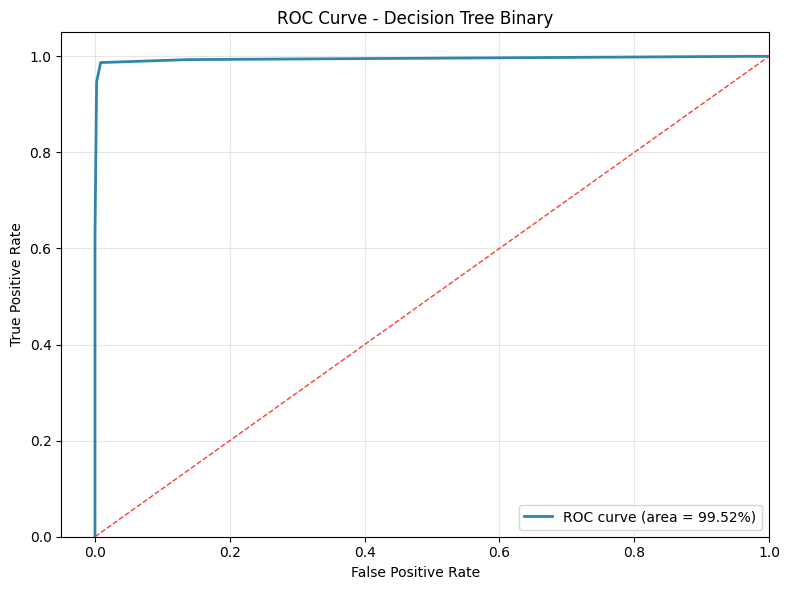

In [ ]:
dt_model, dt_cv_scores = train_decision_tree(
    X_train, y_train, 
    max_depth=5,
    cv_test=True,
    logger=logger
)

fpr_dt, tpr_dt, auc_dt = roc_analysis_binary(
    model=dt_model,
    X_test=X_test,
    y_test=y_test,
    title="Decision Tree Binary",
    logger=logger,
    plot=True,
    save_fig=True
)

## Test 2: Random Forest + ROC Analysis

2025-11-27 04:23:52,741 - INFO - Performing Random Forest cross-validation...
2025-11-27 04:23:53,202 - INFO - Training Random Forest on full training set...
2025-11-27 04:23:53,202 - INFO - Training Random Forest on full training set...
2025-11-27 04:23:53,319 - INFO - ==================================================
2025-11-27 04:23:53,320 - INFO - RANDOM FOREST MODEL
2025-11-27 04:23:53,320 - INFO - ==================================================
2025-11-27 04:23:53,321 - INFO - Parameters: n_estimators=5, max_depth=5, max_features=sqrt
2025-11-27 04:23:53,322 - INFO - Cross-validation scores: [0.982625 0.986375 0.987875 0.98925  0.9845  ]
2025-11-27 04:23:53,323 - INFO - Mean CV score: 0.9861 (+/- 0.0024)
2025-11-27 04:23:53,323 - INFO - Running analysis for scikit-learn model: Random Forest Binary
2025-11-27 04:23:53,319 - INFO - ==================================================
2025-11-27 04:23:53,320 - INFO - RANDOM FOREST MODEL
2025-11-27 04:23:53,320 - INFO - ===========

🔄 Analyse ROC en cours...


2025-11-27 04:23:53,606 - INFO - ROC curve saved to: /home/loup/2A_TELECOM/Programmation/Projet_d_application/AdversarialNIDS/results/roc_analysis/Random_Forest_Binary_roc_analysis.png


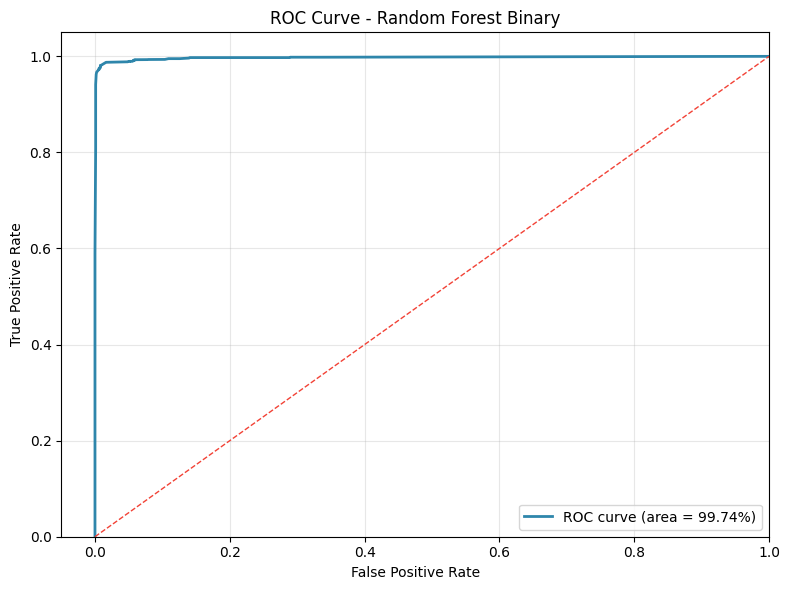

In [ ]:
rf_model, rf_cv_scores = train_random_forest(
    X_train, y_train,
    n_estimators=5,  # Réduit pour les tests
    max_depth=5,
    cv_test=True,
    logger=logger
)

fpr_rf, tpr_rf, auc_rf = roc_analysis_binary(
    model=rf_model,
    X_test=X_test,
    y_test=y_test,
    title="Random Forest Binary",
    logger=logger,
    plot=True,
    save_fig=True
)